#  Perceptron - Classificação de Petróleo
### Autor: Gustavo Silveira Dias
Atividade prática de Tópicos Especiais em Inteligência Artificial: Redes Neurais Artificiais - Instituto Federal de Minas Gerais (IFMG)

Este notebook implementa o algoritmo Perceptron conforme a atividade proposta:
- Treina o modelo 5 vezes (T1–T5) com pesos aleatórios diferentes.
- Registra os pesos iniciais e finais (Tabela 1).
- Classifica novas amostras (Tabela 2).
- Calcula taxa de acerto e exibe o gráfico de convergência do erro.


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

## Funções auxiliares

In [40]:
def degrauBipolar(u):
    return np.where(u >= 0, 1, -1)

def classifica(w, x):
    u = np.dot(w.T, x)
    return degrauBipolar(u)

## Carregando e preparando os dados

In [41]:
dados = pd.read_csv('tabela_treino.csv', sep=';', decimal='.')
N_amostras = dados.shape[0]
N_variaveis = dados.shape[1] - 1

x = dados.iloc[:, 0:N_variaveis].values
y = dados.iloc[:, N_variaveis].values

bias = np.ones((N_amostras, 1)) * -1
x = np.hstack((bias, x))

## Parâmetros e estrutura do Perceptron

In [42]:
eta = 0.01
tolerancia = 0.01
MaxEpocas = 1000
num_treinos = 5

## Treinamento dos 5 modelos (T1 a T5)

In [43]:
resultados = []
taxas = []
erros = []

for treino in range(1, num_treinos + 1):
    print(f'\n=== Treinamento T{treino} ===')
    w = np.random.uniform(0, 1, N_variaveis + 1)
    w_inicial = w.copy()
    epoca = 0
    erroEpocas = []
    criterioErro = True
    criterioEpocas = True

    while criterioErro and criterioEpocas:
        erroAtual = 0
        epoca += 1
        indices = np.random.permutation(N_amostras)

        for i in range(N_amostras):
            idx = indices[i]
            xi = x[idx, :]
            u = np.dot(w.T, xi)
            yhat = degrauBipolar(u)
            e = y[idx] - yhat
            w = w + (eta * e * xi)
            erroAtual += abs(e)

        erroMedio = erroAtual / N_amostras
        erroEpocas.append(erroMedio)
        criterioErro = erroMedio > tolerancia
        criterioEpocas = epoca < MaxEpocas

    w_final = w.copy()
    erros.append(erroEpocas)
    resultados.append((treino, w_inicial, w_final))

    yhat = np.array([classifica(w, x[i, :]) for i in range(N_amostras)])
    taxa = accuracy_score(y, yhat) * 100
    taxas.append(taxa)
    print(f'Treino T{treino} finalizado - Épocas: {epoca} - Taxa de acerto: {taxa:.2f}%')


=== Treinamento T1 ===
Treino T1 finalizado - Épocas: 1000 - Taxa de acerto: 53.33%

=== Treinamento T2 ===
Treino T2 finalizado - Épocas: 1000 - Taxa de acerto: 56.67%

=== Treinamento T3 ===
Treino T3 finalizado - Épocas: 1000 - Taxa de acerto: 50.00%

=== Treinamento T4 ===
Treino T4 finalizado - Épocas: 1000 - Taxa de acerto: 53.33%

=== Treinamento T5 ===
Treino T5 finalizado - Épocas: 1000 - Taxa de acerto: 46.67%


## Tabela 1 - Pesos iniciais e finais

In [44]:
num_pesos = len(resultados[0][1])  # tamanho de w_inicial

colunas = (['Treino'] +
           [f'W{i}_ini' for i in range(num_pesos)] +
           [f'W{i}_fin' for i in range(num_pesos)] +
           ['Taxa_acerto'])

tabela1 = pd.DataFrame(columns=colunas)

for (treino, w_inicial, w_final), taxa in zip(resultados, taxas):
    linha = [treino] + list(w_inicial) + list(w_final) + [f'{taxa:.2f}%']
    tabela1.loc[len(tabela1)] = linha

print("Tabela de Pesos Iniciais, Finais e Taxa de Acerto:")
print(tabela1)

Tabela de Pesos Iniciais, Finais e Taxa de Acerto:
   Treino    W0_ini    W1_ini    W2_ini    W3_ini    W4_ini     W0_fin  \
0       1  0.424663  0.603570  0.125821  0.342325  0.208469  29.584663   
1       2  0.589264  0.309347  0.682962  0.959240  0.952067  28.849264   
2       3  0.991520  0.681624  0.725840  0.281949  0.601038  28.751520   
3       4  0.827140  0.507045  0.686590  0.943531  0.157321  29.407140   
4       5  0.609754  0.773521  0.049383  0.472316  0.210440  28.589754   

     W1_fin    W2_fin    W3_fin    W4_fin Taxa_acerto  
0  1.083570 -1.812359  2.277215 -1.259511      53.33%  
1  2.329347 -3.150476  2.978282 -0.292353      56.67%  
2  2.221624 -2.172826  2.490187  0.566798      50.00%  
3  1.147045 -0.384324  2.309849 -0.995339      53.33%  
4  2.473521 -0.154861  2.884044  0.930840      46.67%  


## Gráfico de convergência do erro

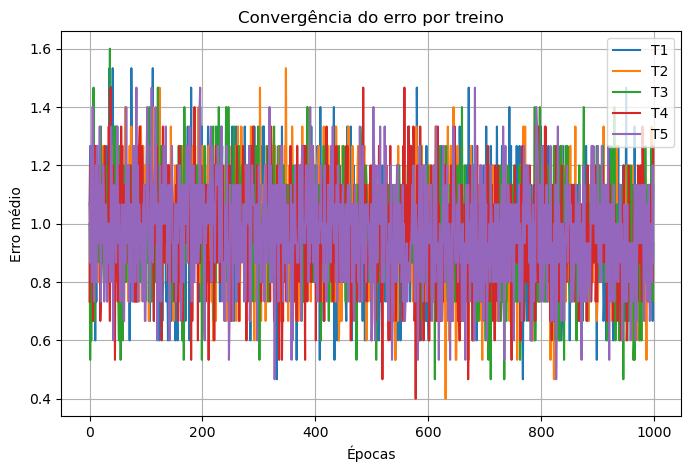

In [45]:
plt.figure(figsize=(8,5))
for i, erroEpocas in enumerate(erros, start=1):
    plt.plot(erroEpocas, label=f'T{i}')
plt.title('Convergência do erro por treino')
plt.xlabel('Épocas')
plt.ylabel('Erro médio')
plt.legend()
plt.grid(True)
plt.show()

## Discussão dos resultados (Markdown no relatório final)

### Questão 5:
Aumentar o número de épocas permite que o modelo refine melhor os pesos, diminuindo o erro médio até certo ponto.
Após muitas épocas, o erro tende a estabilizar (não melhora mais).

### Questão 6:
Uma taxa de aprendizado maior acelera o processo, mas pode causar oscilações ou instabilidade.
Valores menores são mais lentos, porém mais estáveis.

### Questão 7:
Se o erro médio nunca chega próximo de zero e o modelo não separa bem as classes,
isso indica que as classes P1 e P2 **não são linearmente separáveis**.